# Notebook exemples de la NMF

## 1 - Petit exemple de décomposition
- On prend $W=rand(K,L)$ et $H=rand(L, M)$
- On multiplie et on regarde $V=WH$

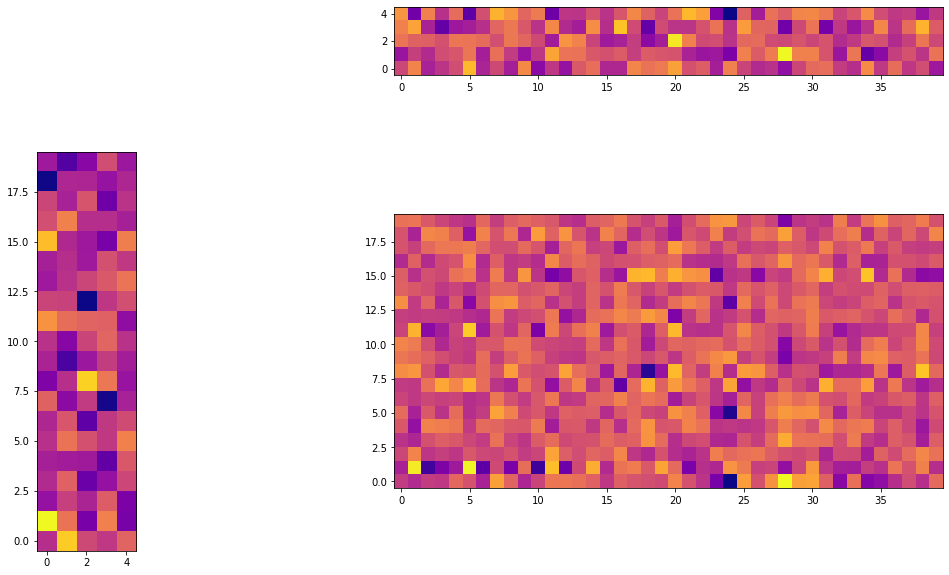

In [2]:
import numpy as np
import matplotlib.pyplot as plt

K, L, M = 20, 5, 40 # L est la taille de l'esapce latent

W = np.random.randn(K, L)
H = np.random.randn(L, M)

V = W @ H

fig, axs = plt.subplots(2,2, figsize=(16,9), gridspec_kw={'height_ratios': [1, 2]})
fig.delaxes(axs[0,0])
axs[0,1].imshow(H, origin="lower", cmap="plasma")
axs[1,0].imshow(W, origin="lower", cmap="plasma")
axs[1, 1].imshow(V, origin="lower", cmap="plasma")

fig.tight_layout()
plt.show()

## II - Application sur une note de Violon
- Regardons maintenant le résultat de la NMF avec $L=1$ sur une note.

0.0 9.009342403628118


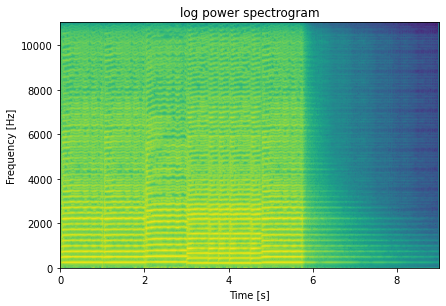

In [17]:
import numpy as np 
import librosa as li

import scipy.signal as sig

import IPython.display as ipd

from sklearn.decomposition import NMF

y, sr= li.load("multimedia/audio/MI205_NMF_fake1.wav")
# y = y[int(1.80 * sr):int(2.69 * sr)] # on prend juste la première note

F, T, Y = sig.stft(y, sr, nperseg=1024)

log_pow_Y = np.log(np.abs(Y) ** 2)


fig, ax = plt.subplots()
print(T[0], T[-1])

plt.tight_layout()
plt.imshow(log_pow_Y, origin="lower", aspect="auto", extent=[T[0], T[-1], F[0], F[-1]])


ax.set_title('log power spectrogram')

ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [s]')

ipd.Audio(y, rate=sr)


- Maintenant, regardons une décomposition de la NMF en utilisant la librairie `scikit-learn`

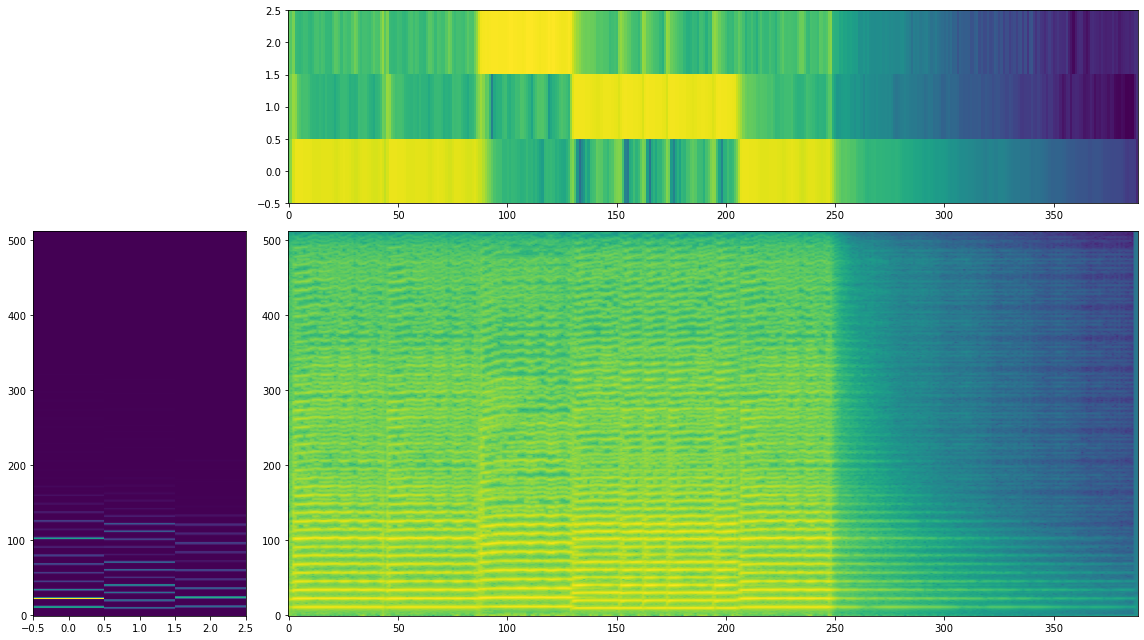

In [18]:
model = NMF(n_components=4, init='random', random_state=3, solver="mu", beta_loss=1.0) # L=1 et on initialise aléatoirement

W = model.fit_transform(np.abs(Y))
H = model.components_


fig, axs = plt.subplots(2,2, figsize=(16,9), gridspec_kw={'height_ratios': [1, 2], 'width_ratios':[1,4]})
fig.delaxes(axs[0,0])
axs[0,1].imshow(np.log(H + 1e-10), origin="lower", aspect="auto", interpolation="nearest")
axs[1,0].imshow(W, origin="lower", aspect="auto", interpolation="nearest")
axs[1, 1].imshow(log_pow_Y, origin="lower", aspect="auto")

fig.tight_layout()
plt.show()

# Application sur une gamme de violon

0.0 7.616145124716554


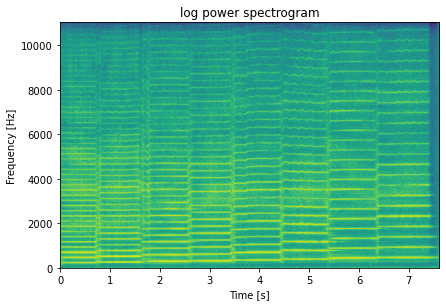

In [26]:
import numpy as np 
import librosa as li

import scipy.signal as sig

import IPython.display as ipd

from sklearn.decomposition import NMF

y, sr= li.load("multimedia/audio/Violon_gamme.wav")
y = y[int(0.79 * sr):int(8.39 * sr)] # on prend juste la première note

F, T, Y = sig.stft(y, sr, nperseg=1024)

log_pow_Y = np.log(np.abs(Y) ** 2)


fig, ax = plt.subplots()
print(T[0], T[-1])

plt.tight_layout()
plt.imshow(log_pow_Y, origin="lower", aspect="auto", extent=[T[0], T[-1], F[0], F[-1]])


ax.set_title('log power spectrogram')

ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [s]')

ipd.Audio(y, rate=sr)


/home/mafontaine/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


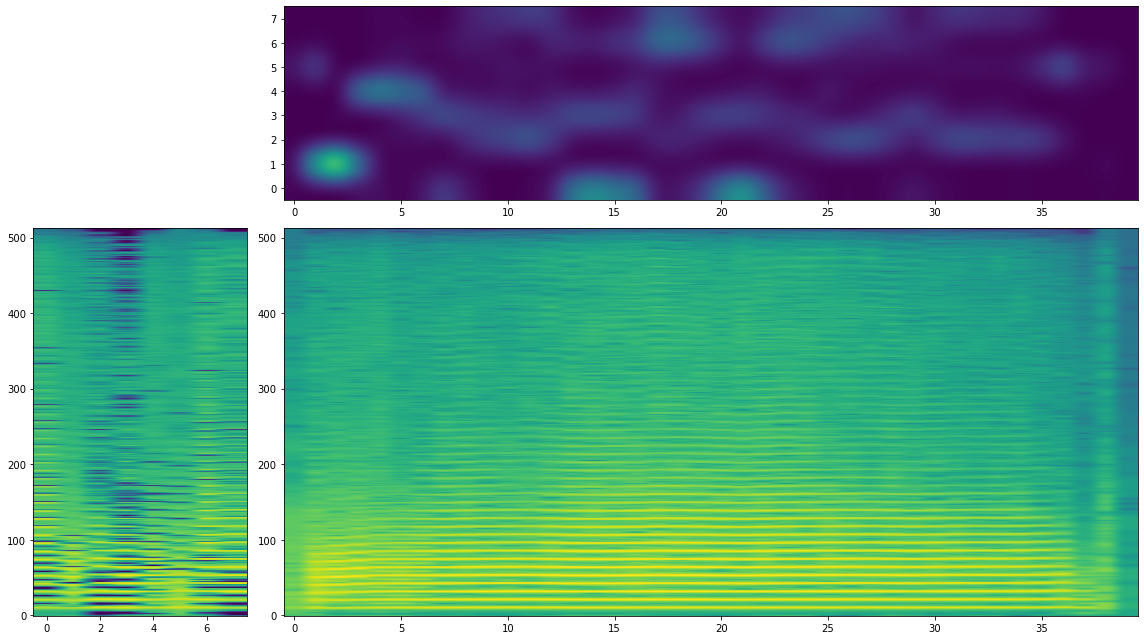

In [7]:
model = NMF(n_components=8, init='random', random_state=0, solver="mu", beta_loss=.0) # L=1 et on initialise aléatoirement

W = model.fit_transform(np.abs(Y))
H = model.components_


fig, axs = plt.subplots(2,2, figsize=(16,9), gridspec_kw={'height_ratios': [1, 2], 'width_ratios':[1,4]})
fig.delaxes(axs[0,0])
axs[0,1].imshow(H, origin="lower", aspect="auto", interpolation="quadric")
axs[1,0].imshow(np.log(W + 1e-10), origin="lower", aspect="auto")
axs[1, 1].imshow(log_pow_Y, origin="lower", aspect="auto")

fig.tight_layout()
plt.show()